In [7]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Frame 
data = pd.read_csv("data/Monatszahlen-Verkehrsunfälle.csv")

In [8]:
#Select only important columns
features = ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']

#Make the data only the important columns
data = data[features]

# Rename the columns we will be working on 
data = data.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

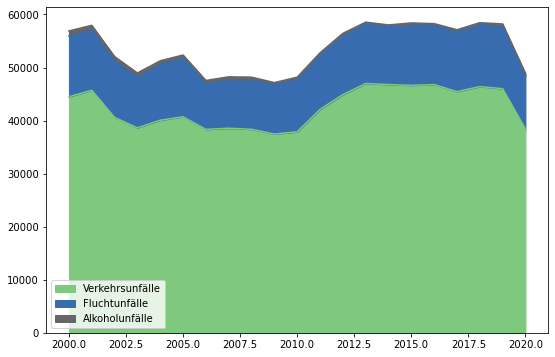

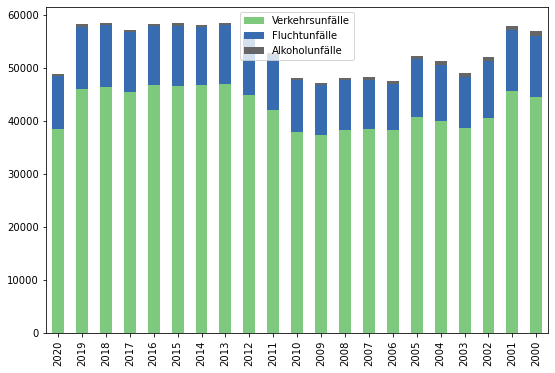

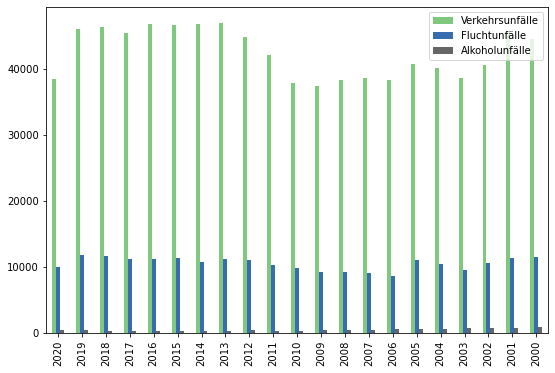

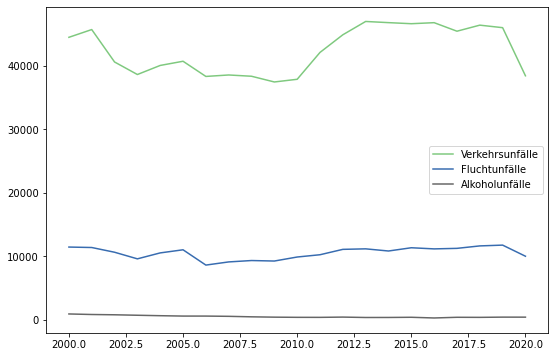

In [12]:
# Data Visualization

accidents = data[data['Year'] < 2021]

Verkehrsunfälle = accidents[(
    (accidents['Category'] == 'Verkehrsunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Fluchtunfälle = accidents[(
    (accidents['Category'] == 'Fluchtunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Alkoholunfälle = accidents[(
    (accidents['Category'] == 'Alkoholunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_category = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['Value'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['Value'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['Value'].to_numpy()
    },
    index= years
)

accidents_category.plot(kind='area',colormap='Accent',)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent', stacked= True)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent')
plt.gcf().set_size_inches(9,6)
accidents_category.plot(colormap='Accent')
plt.gcf().set_size_inches(9,6)

In [13]:
# Remove null values
data = data.dropna()

# Remove the 'Summe' from Month column 
data = data[data['Month'] != 'Summe']

# Get only month numbers in Month column
data['Month'] = data['Month'].str[-2:]

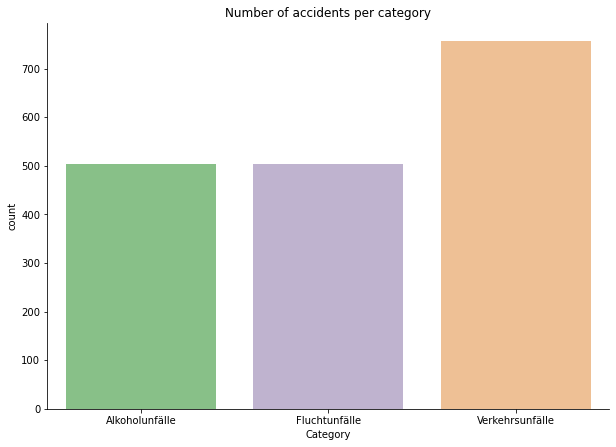

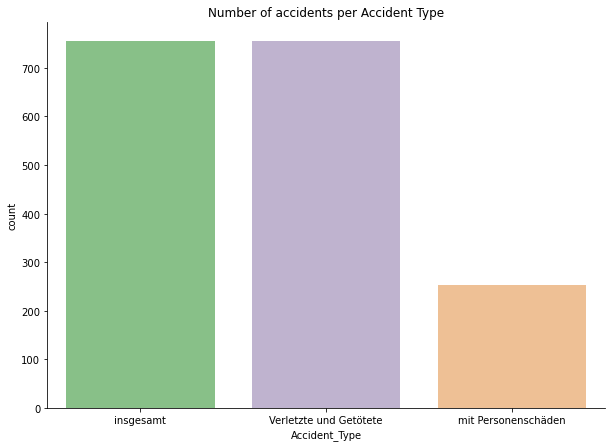

In [15]:
# Plot Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)